In [157]:
import requests
import numpy as np
import pandas as pd
import sklearn.ensemble as sk
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.neighbors
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [158]:
sex_dic={'male':0,'female':1}
embarked_dic={'S':0,'C':1,'Q':2}
def rename(df):
    df['Sex']=map(lambda x: sex_dic[x],df['Sex'])
    df['Embarked']=map(lambda x: embarked_dic[x],df['Embarked'])
    return df

1. Creat three train data subsets: (1) with all features (2) without age (3) without age and Fare
===

In [159]:
train=pd.read_csv('train.csv')
train.head()

train1=train[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']].copy()
train2=train[['PassengerId','Pclass','Sex','SibSp','Parch','Fare','Embarked','Survived']].copy()
train3=train[['PassengerId','Pclass','Sex','SibSp','Parch','Embarked','Survived']].copy()
train1=train1.dropna()
train2=train2.dropna()
train3=train3.dropna()
print train1.shape
print train2.shape
print train3.shape
print train.shape

train1=rename(train1)
train2=rename(train2)
train3=rename(train3)

sub_train1,sub_val1=sklearn.cross_validation.train_test_split(train1,test_size=0.33,random_state=99)
sub_train1=pd.DataFrame(sub_train1)
sub_train1.columns=train1.columns
sub_val1=pd.DataFrame(sub_val1)
sub_val1.columns=train1.columns
print sub_train1.shape
print sub_val1.shape

sub_train2,sub_val2=sklearn.cross_validation.train_test_split(train2,test_size=0.33,random_state=99)
sub_train2=pd.DataFrame(sub_train2)
sub_train2.columns=train2.columns
sub_val2=pd.DataFrame(sub_val2)
sub_val2.columns=train2.columns
print sub_train2.shape
print sub_val2.shape

sub_train3,sub_val3=sklearn.cross_validation.train_test_split(train3,test_size=0.33,random_state=99)
sub_train3=pd.DataFrame(sub_train3)
sub_train3.columns=train3.columns
sub_val3=pd.DataFrame(sub_val3)
sub_val3.columns=train3.columns
print sub_train3.shape
print sub_val3.shape

(712, 9)
(889, 8)
(889, 7)
(891, 12)
(477, 9)
(235, 9)
(595, 8)
(294, 8)
(595, 7)
(294, 7)


2. Import test data and split into three subsets: test1,test2,test3
===

In [160]:
test=pd.read_csv('test.csv')
test_sub=test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()
print test_sub.shape
#test_sub.head()
test1=test_sub
test1=test1.dropna()
test1=rename(test1)
print test1.shape

test_nan=test_sub[test_sub.isnull().any(axis=1)]
print test_nan.shape

test2=test_nan.drop('Age',axis=1)
test2=test2.dropna()
test2=rename(test2)
print test2.shape

test3=test_nan.drop('Age',axis=1)
test3=test3[test3.isnull().any(axis=1)]
test3=rename(test3)
test3=test3.drop('Fare',axis=1)
print test3.shape

print test.shape[0]==test1.shape[0]+test2.shape[0]+test3.shape[0]

(418, 8)
(331, 8)
(87, 8)
(86, 7)
(1, 6)
True


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3. Train data
===

In [161]:
sub_train1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,63,1,0,45,1,0,83.4750,0,0
1,398,2,0,46,0,0,26.0000,0,0
2,704,3,0,25,0,0,7.7417,2,0
3,334,3,0,16,2,0,18.0000,0,0
4,495,3,0,21,0,0,8.0500,0,0


pclass,sex
----

In [162]:
agemax=max(train['Age'])
agemin=min(train['Age'])
agerange=(agemax-agemin)*1.0/3

faremax=max(train['Fare'])
faremin=min(train['Fare'])
farerange=(faremax-faremin)*1.0/2

In [169]:
temp_train=sub_train1
temp_val=sub_val1
temp_test=test1
col=['Age','SibSp','Parch','Fare','Embarked','intercept']
_col=['Age','SibSp','Parch','Fare','Embarked']

In [170]:
temp_train_1=temp_train[temp_train['Sex']==0]
temp_train_2=temp_train[temp_train['Sex']==0]

temp_train_11=temp_train_1[temp_train_1['Pclass']==1]
temp_train_12=temp_train_1[temp_train_1['Pclass']==2]
temp_train_13=temp_train_1[temp_train_1['Pclass']==3]

temp_train_21=temp_train_2[temp_train_2['Pclass']==1]
temp_train_22=temp_train_2[temp_train_2['Pclass']==2]
temp_train_23=temp_train_2[temp_train_2['Pclass']==3]

In [171]:
temp_val_1=temp_val[temp_val['Sex']==0]
temp_val_2=temp_val[temp_val['Sex']==0]

temp_val_11=temp_val_1[temp_val_1['Pclass']==1]
temp_val_12=temp_val_1[temp_val_1['Pclass']==2]
temp_val_13=temp_val_1[temp_val_1['Pclass']==3]

temp_val_21=temp_val_2[temp_val_2['Pclass']==1]
temp_val_22=temp_val_2[temp_val_2['Pclass']==2]
temp_val_23=temp_val_2[temp_val_2['Pclass']==3]

In [172]:
temp_test_1=temp_test[temp_test['Sex']==0]
temp_test_2=temp_test[temp_test['Sex']==0]

temp_test_11=temp_test_1[temp_test_1['Pclass']==1]
temp_test_12=temp_test_1[temp_test_1['Pclass']==2]
temp_test_13=temp_test_1[temp_test_1['Pclass']==3]

temp_test_21=temp_test_2[temp_test_2['Pclass']==1]
temp_test_22=temp_test_2[temp_test_2['Pclass']==2]
temp_test_23=temp_test_2[temp_test_2['Pclass']==3]

In [173]:
train_list=[temp_train_11,temp_train_12,temp_train_13,temp_train_21,temp_train_22,temp_train_23]
val_list=[temp_val_11,temp_val_12,temp_val_13,temp_val_21,temp_val_22,temp_val_23]
test_list=[temp_test_11,temp_test_12,temp_test_13,temp_test_21,temp_test_22,temp_test_23]

In [174]:
def logistic_regression_train(train,col=col):

    train['intercept']=1.0
    logit=sm.Logit(train['Survived'],train[col])
    result=logit.fit()
    paras=result.params
    return paras

from math import exp
def probability(row,paras):
    z=paras[len(paras)-1]
    for i in np.arange(0,len(paras)-1):
        z=z+row[i]*paras[i]
    return 1/(1+exp(-1.0*z))

def survive(pp,df):
    temp=df[['Survived','Pred']].copy()
    temp['TF']=temp['Pred']>=pp
    cm=sklearn.metrics.confusion_matrix(temp['Survived'],temp['TF'])
    return (cm[0,0]+cm[1,1])*1.0/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])

In [190]:
for ii in np.arange(3,4,1):
    _train=train_list[ii]
    _val=val_list[ii]
    _test=test_list[ii]
    
    paras=logistic_regression_train(_train)
    
    compare=_val[_col].copy()
    pred=[]
    for jj in np.arange(len(compare.Age)):
        pred.append(probability(compare.iloc[jj],paras))
    _val['Pred']=pred
    
    xlist=np.linspace(0,1,10000)
    acc=map(lambda x: survive(x,_val),xlist)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Optimization terminated successfully.
         Current function value: 0.635702
         Iterations 5


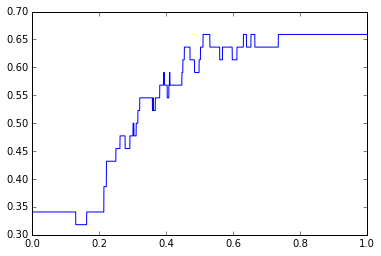

In [191]:
plt.plot(xlist,acc)

In [189]:
_val

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Pred
4,631,1,0,80,0,0,30.0000,0,1,0.129880
8,103,1,0,21,0,1,77.2875,0,0,0.498322
9,448,1,0,34,0,0,26.5500,0,1,0.411293
11,699,1,0,49,1,1,110.8833,1,0,0.449830
13,702,1,0,35,0,0,26.2875,0,1,0.403043
17,55,1,0,65,0,1,61.9792,1,0,0.300933
20,171,1,0,61,0,0,33.5000,0,0,0.221771
22,274,1,0,37,0,1,29.7000,1,0,0.510131
27,584,1,0,36,0,0,40.1250,1,0,0.568058
32,873,1,0,33,0,0,5.0000,0,0,0.409758
